### Score: `[105]`

Q1. `[9]` 注意变量相等的情况
```python
not b>c
```
is not equal to `b<c`, but equal to `b<=c`

Q2. `[10]` Good job!

Q3. `[16.5+5.5]` Quite great job! 很好的思路，简洁的实现！

Q4. `[5.5+16.5+5]` Good job!

Q5. `[5.5+26+5.5]` Good job!

各题注释用`### Note`给出，请自行查阅。

**Collaboration:**  

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own. 

There are two requirements for collaboration: 

* Cite your collaborators **fully and completely** (*e.g.*, "XXX explained to me what is asked in problem set 3"). Or cite online resources (*e.g.*, "I got inspired by reading XXX") that helped you.

* Write your scripts and report **independently** - the scripts and report must come from you only.

# 1. Flowchart 

Write a function `Print_values` with arguments `a`, `b`, and `c` to reflect the following flowchart. Here the purple parallelogram operator on a list `[x, y, z]` is to compute and print `x+y-10z`. Try your output with some random `a`, `b`, and `c` values. Report your output when `a = 10, b = 5, c = 1`.

In [14]:
def Print_values():   #define a function called Print_values
    a = float(input("num1:")) #Enter the first number
    b = float(input("num2:"))  #Enter he second number
    c = float(input("num3:")) #Enter the third number
    list = [a, b, c]   # Create a list including the three numbers
    if a > b:
        if b > c:
            list = [a, b, c]  #a>b>c
        elif b < c and a > c: ### Note: (not b>c) should be (b<=c)，或者直接用else
            list = [a, c ,b]  #a>c>b
        elif b < c and a < c: ### Note: (not a>c) should be (a<=c)
            list = [c, a, b]  #c>a>b
    elif a < b: ### Note: Same Error, a>b判断为False时还有a==b的情况。其他地方同理
        if b > c and a < c:
            list = []         #none
        elif b < c:
            list = [c, b, a]  #c>b>a
    print(list)
    if list == []:
        print("the list is empty,no answers") #if b>c>a, the list is empty, no answers
    else:
        print(list[0]+list[1]-10*list[2]) #compute and print x+y-10z
Print_values()   

num1:10
num2:5
num3:1
[10.0, 5.0, 1.0]
5.0


Report your output when `a = 10, b = 5, c = 1`: [5]

[ 首先输入三个数a,b,从，然后通过流程图利用if语句得到最终的输出结果，在b>c>a时，输出为[ ],无法计算结果，因此单列出来，输出结果为"the list is empty, no answers" ]

# 2. Continuous ceiling function

Given a list with `N` positive integers. For every element `x` of the list, find the value of continuous ceiling function defined as `F(x) = F(ceil(x/3)) + 2x`, where `F(1) = 1`. 

In [15]:
import math
n = int(input("enter a positive integer:")) # enter a positive integer
N_list = []
for x1 in range(1, n+1):
    N_list.append(x1)      #create a list with N elements ranging from 1 to N
print(N_list)              #output the list with N elements
for x in N_list:
    def F(x): ### Note: 函数的定义放在程序开头更好
        if x==1:
            return 1   # if x=1,F(x)=1
        else: 
            return F(math.ceil(x/3))+2*x       #if x>1,F(x)= F(ceil(x/3)) + 2x
    print (F(x))

enter a positive integer:8
[1, 2, 3, 4, 5, 6, 7, 8]
1
5
7
13
15
17
21
23


[此题为迭代问题，首先创建N个正整数的List,然后给定初值F(x)=1,x=1；F(x)= F(ceil(x/3)) + 2x，x>1 ]

# 3. Dice rolling

**3.1** Given `10` dice each with `6` faces, numbered from `1` to `6`. Write a function `Find_number_of_ways` to find the number of ways to get sum `x`, defined as the sum of values on each face when all the dice are thrown.

In [11]:
def Find_number_of_ways(x):    # Define a function，x denotes the sum value
    # Initialize a dp array where dp[i][j] represents the number of ways to get sum j using i dice
    dp = [[0 for _ in range(x + 1)] for _ in range(11)]
    # Base case: There is exactly one way to achieve sum 0 with 0 dice
    dp[0][0] = 1
    # Fill the dp table
    for i in range(1, 11):  # For each die (1-10)
        for j in range(1, x + 1):  # For each possible sum
            dp[i][j] = 0
            # Sum over all the possible face values (1 to 6) for the current die
            for k in range(1, 7):
                if j - k >= 0:
                    dp[i][j] += dp[i - 1][j - k]
    # Return the number of ways to get sum x using 10 dice
    return dp[10][x]

**3.2** Count the number of ways for any `x` from `10` to `60`, assign the number of ways to a list called `Number_of_ways`, so which `x` yields the maximum of `Number_of_ways`?

In [12]:
def Find_max_ways():
    # List to store the number of ways to achieve each sum from 10 to 60
    Number_of_ways = []
    # Compute the number of ways for each sum from 10 to 60
    for x in range(10, 61):
        ways = Find_number_of_ways(x)
        Number_of_ways.append(ways)
    # Find the maximum number of ways and the corresponding sum
    max_ways = max(Number_of_ways)
    max_sum = Number_of_ways.index(max_ways) + 10  # Add 10 to convert index to sum
    return Number_of_ways, max_sum, max_ways
# Find the number of ways for each sum from 10 to 60 and the maximum sum
Number_of_ways, max_sum, max_ways = Find_max_ways()
print("Number of ways for each sum from 10 to 60:", Number_of_ways)
print(f"The sum {max_sum} has the maximum number of ways, which is {max_ways}.")

Number of ways for each sum from 10 to 60: [1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]
The sum 35 has the maximum number of ways, which is 4395456.


So which `x` yields the maximum of `Number_of_ways`? [35]

[1.建立二维的dp table，dp[i][j]表示利用i个骰子得到sum j的方法数，此题i为10。2.对dp table赋初值后建立转移方程，其思路为得到和的方法的数量是使用少一个骰子实现更小和的方法的和 dp[i][j]=dp[i−1][j−1]+dp[i−1][j−2]+⋯+dp[i−1][j−6]。3.构建Number_of_ways数组储存得到10-60之间任一和的方法数，并求取最大值]

# 4. Dynamic programming

**4.1 [5 points]** Write a function `Random_integer` to fill an array of `N` elements by randomly selecting integers from `0` to `10`.

In [4]:
import random
N = int(input("Enter a positive integer N:"))  # Enter a positive integer
def Random_integer(N):
    return [random.randint(0, 10) for _ in range(N)]   # N values range from 0 to 10
Random_integer(N)

[10, 3, 2, 3, 8, 9, 8, 7, 5, 9]

4.2 [15 points] Write a function `Sum_averages` to compute the sum of the average of all subsets of the array. For example, given an array of `[1, 2, 3]`, you `Sum_averages` function should compute the sum of: average of `[1]`, average of `[2]`, average of `[3]`,  average of `[1, 2]`, average of `[1, 3]`, average of `[2, 3]`, and average of `[1, 2, 3]`.  

In [5]:
import itertools
from itertools import combinations
N = int(input("Enter a positive integer N:")) 
arr = Random_integer(N)   #Use this function to creatte an array
for n in range(N):       # create arr_averages--all average values of the subsets of "arr"
        if n == 0:
            arr_averages = arr # The first case, the arr itself
        elif n == N-1:
            arr_averages = [sum(arr)/(N)] #the second case, the average of all the elements of arr
        else:
            Sum = [sum(pair) for pair in itertools.combinations(arr, n+1)] 
            arr_averages = [i/(n+1) for i in Sum]    # the third case, the average of two, three..., elemrnts of the arr
        print(arr_averages)  # print all the subsets to make sure the sum of the average of all subsets 
def Sum_averages(arr):
    m = len(arr) # the number of elements of arr
    total_sum = 0
    # Generate all non-empty subsets
    for r in range(1,m + 1):
        for subset in combinations(arr, r):
            avg = sum(subset) / len(subset)  # the average values of each subset
            total_sum += avg       #the sum of the average values of each subset
    return total_sum
Sum_averages(arr)

[6, 8, 2, 4, 6, 5, 5, 9, 4, 6]
[7.0, 4.0, 5.0, 6.0, 5.5, 5.5, 7.5, 5.0, 6.0, 5.0, 6.0, 7.0, 6.5, 6.5, 8.5, 6.0, 7.0, 3.0, 4.0, 3.5, 3.5, 5.5, 3.0, 4.0, 5.0, 4.5, 4.5, 6.5, 4.0, 5.0, 5.5, 5.5, 7.5, 5.0, 6.0, 5.0, 7.0, 4.5, 5.5, 7.0, 4.5, 5.5, 6.5, 7.5, 5.0]
[5.333333333333333, 6.0, 6.666666666666667, 6.333333333333333, 6.333333333333333, 7.666666666666667, 6.0, 6.666666666666667, 4.0, 4.666666666666667, 4.333333333333333, 4.333333333333333, 5.666666666666667, 4.0, 4.666666666666667, 5.333333333333333, 5.0, 5.0, 6.333333333333333, 4.666666666666667, 5.333333333333333, 5.666666666666667, 5.666666666666667, 7.0, 5.333333333333333, 6.0, 5.333333333333333, 6.666666666666667, 5.0, 5.666666666666667, 6.666666666666667, 5.0, 5.666666666666667, 6.333333333333333, 7.0, 5.333333333333333, 4.666666666666667, 5.333333333333333, 5.0, 5.0, 6.333333333333333, 4.666666666666667, 5.333333333333333, 6.0, 5.666666666666667, 5.666666666666667, 7.0, 5.333333333333333, 6.0, 6.333333333333333, 6.33333333333333

5626.5

**4.3 [5 points]** Call `Sum_averages` with `N` increasing from `1` to `100`, assign the output to a list called `Total_sum_averages`. Plot `Total_sum_averages`, describe what you see.

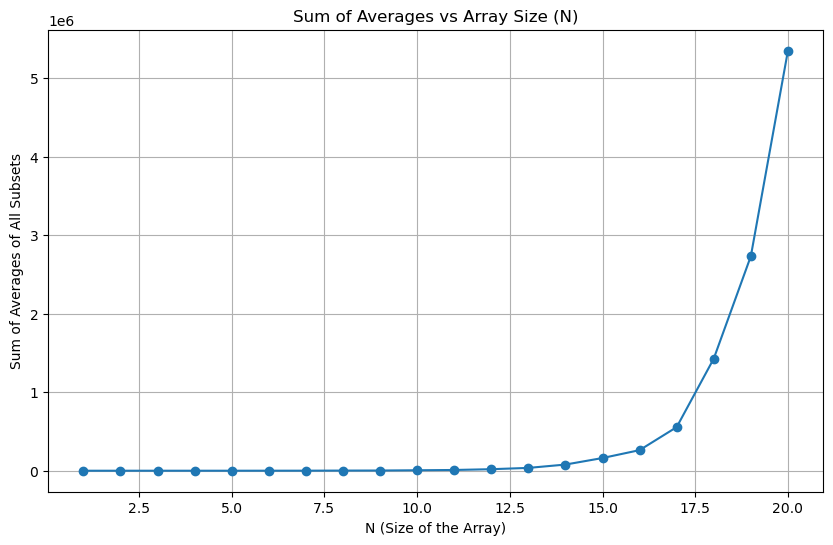

In [6]:
import matplotlib.pyplot as plt
Total_sum_averages = []      # create a list called "Total_sum_averages"
for N in range(1, 101):
    arr = Random_integer(N) # use this function to create an array of N elements by randomly selecting integers from 0 to 10.
    total_avg_sum = Sum_averages(arr) #use this function to gain the sum of the average values of each subset
    Total_sum_averages.append(total_avg_sum) # get all the values of the sum of the average values of each subset when N -[1,100]
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), Total_sum_averages, marker='o')
plt.xlabel('N (Size of the Array)')
plt.ylabel('Sum of Averages of All Subsets')
plt.title('Sum of Averages vs Array Size (N)')
plt.grid(True)
plt.show()

### Note: 没关系，不是电脑的问题~可以考虑使用数学方法来简化算法

Describe what you see. [ It shows explosive growth.呈指数爆炸性增长 ]

[ 第一问主要是利用random.randint函数求得；第二问首先分情况找出所有的子集的平均数数组，并打印；其次求得所有子集平均数数组之和，二者去相互印证。 此过程itertools模块中的combinations 函数。第三问调用第一和第二问的函数去得到N从1到100的100组子集平均数之和，并绘图。但在绘图时，可能由于本人电脑问题，绘制N从1-100的图像时出现没有内核的问题，经过多次尝试本图仅展示至N=20，但也看出整体趋势，代码部分在输出N从1至20图像后改回N从1至100]

# 5. Path counting

**5.1 [5 points]** Create a matrix with `N` rows and `M` columns, fill the right-bottom corner and top-left corner cells with `1`, and randomly fill the rest of matrix with integer `0` or `1`.

In [9]:
import numpy as np
N = int(input("Enter number of rows: "))
M = int(input("Enter number of columns: "))
def create_matrix(N, M):
    # Create a matrix with random 0s and 1s
    matrix = np.random.randint(0, 2, size=(N, M))
    # Set the top-left and bottom-right corners to 1
    matrix[0, 0] = 1
    matrix[N-1, M-1] = 1
    return matrix
create_matrix(N, M)

Enter number of rows: 4
Enter number of columns: 5


array([[1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1],
       [1, 0, 1, 0, 1]])

5.2 [25 points] Consider a cell marked with 0 as a blockage or dead-end, and a cell marked with 1 is good to go. Write a function Count_path to count the total number of paths to reach the right-bottom corner cell from the top-left corner cell.
Notice: for a given cell, you are only allowed to move either rightward or downward.

In [9]:
import numpy as np
N = int(input("Enter number of rows: "))
M = int(input("Enter number of columns: "))
matrix = create_matrix(N, M)  #use this function in 5.1 to create matrix
print(matrix)
def Count_path(matrix):
    # Create a dp table to store the number of paths at each cell
    dp = np.zeros((N, M), dtype=int)
    # Initialize the starting point
    if matrix[0, 0] == 1:
        dp[0, 0] = 1
    # Fill the dp table
    for i in range(N):
        for j in range(M):
            if matrix[i, j] == 1:
                if i > 0:
                    dp[i, j] += dp[i - 1, j]  # Coming from above
                if j > 0:
                    dp[i, j] += dp[i, j - 1]  # Coming from the left
    # The value at the bottom-right corner is the number of paths
    return dp[N - 1, M - 1]
    total_paths = Count_path(matrix)
    print(total_paths)   
Count_path(matrix)

0

**5.3 [5 points]** Let `N = 10, M = 8`, run `Count_path` for `1000` times, each time the matrix (except the right-bottom corner and top-left corner cells, which remain being `1`) is re-filled with integer `0` or `1` randomly, report the mean of total number of paths from the `1000` runs.

In [12]:
def simulate_count_paths(N, M, runs):
    path_counts = []
    for _ in range(runs):
        # Generate a new random matrix with N rows and M columns
        matrix = create_matrix(N, M)
        # Count the number of paths for the generated matrix
        total_paths = Count_path(matrix)
        # Append the count to the results list
        path_counts.append(total_paths)
    # Calculate the mean of all path counts
    mean_paths = np.mean(path_counts)
    
    return mean_paths
    print(mean_paths)

# N=10, M=8, and 1000 runs
N = 10
M = 8
runs = 1000

mean_total_paths = simulate_count_paths(N, M, runs)
mean_total_paths


0.386

Report the mean of total number of paths from the `1000` runs. [0.386]

[ 第一问分情况为矩阵元素赋值。第二问创建 dp table,dp[i][j]存储从（0,0）到达单元格（i,j）的方法数,对其赋初值后建立转移方程，如果当前单元格（i，j）为1，则到达此单元格的方法数将为以下值之和：来自上边单元格的路径(i-1，j） 来自左侧单元格的路径（i，j-1)。第三问创建函数，调用前两个函数1000次，求得到达方法数平均值，首先建立path_counts数组来储存1000次得到的方法数，再求其平均值]